<a href="https://colab.research.google.com/github/Mia-Tay/Prac/blob/master/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (3).json


{'kaggle (1).json': b'{"username":"miasun","key":"54a9518022636db2b93c4c759f5f703f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `cp kaggle(1).json ~/.kaggle/'


In [3]:
!pip install kaggle

In [4]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.1
Uninstalling scikit-learn-1.0.1:
  Successfully uninstalled scikit-learn-1.0.1
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)


In [5]:
pip install scipy


In [6]:
import sklearn

sklearn.__version__

'1.0.1'

In [7]:
from google.colab import drive
drive.mount('/content/drive')
folder= 'drive/My Drive/kardiolabs/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


#1, Introduction


*   Terminology explanination
*   Basic data exploration 



**Terminology explanination**

--sex - (1 = male; 0 = female)
--cp - chest pain type

*   0: Typical angina: chest pain related decrease blood supply to the heart
*   1: Atypical angina: chest pain not related to heart
*   2: Non-anginal pain: typically esophageal spasms (non heart related)
*   3: Asymptomatic: chest pain not showing signs of disease

--trestbps - resting blood pressure (in mm Hg on admission to the hospital)
--anything above 130-140 is typically cause for concern

--chol - serum cholestoral in mg/dl（above 200 is cause for concern）
--serum = LDL + HDL + .2 * triglycerides

--fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)>126' mg/dL signals diabetes

--restecg - resting electrocardiographic results


*   0: Nothing to note
*   1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
*   2: Possible or definite left ventricular hypertrophy。Enlarged heart's main pumping chamber

--thalach - maximum heart rate achieved

--exang - exercise induced angina (1 = yes; 0 = no)

--oldpeak - ST depression induced by exercise relative to rest
--looks at stress of heart during excercise, unhealthy heart will stress more


--slope - the slope of the peak exercise ST segment

*   0: Upsloping: better heart rate with excercise (uncommon)
*   1: Flatsloping: minimal change (typical healthy heart)
*   2: Downslopins: signs of unhealthy heart

--ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

--thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
--target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [9]:
df = pd.read_csv(folder+'heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'Correlation Heatmap')

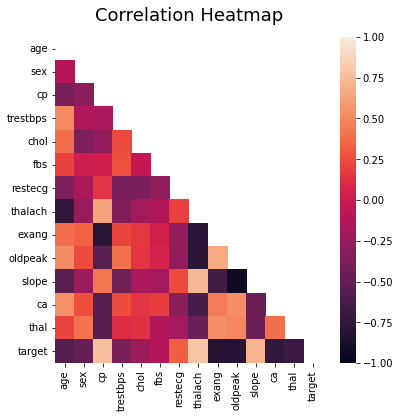

In [12]:
# create correlation map
corr_matrx = df.corr()
corr_matrx
mask = np.triu(np.ones_like(corr_matrx, dtype=np.bool))

plt.figure(figsize=(6,6))

heatmap = sns.heatmap(corr_matrx.corr(), mask=mask, vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f585d6aba50>,
      dtype=object)

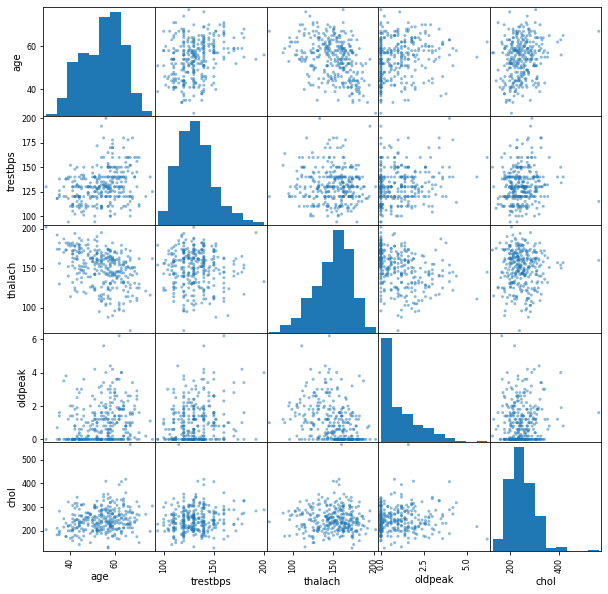

In [13]:
#based on data, seperate them into numeric/ category dataset. Visually explore the numerical dataset. 
num_cat_headers = ['age','trestbps', 'thalach', 'oldpeak', 'chol']
num_cat = df[['age','trestbps', 'thalach', 'oldpeak', 'chol']]

scatter_matrix(num_cat, figsize=(10,10))

In [14]:
df.groupby('target')['age','trestbps', 'thalach', 'oldpeak', 'chol'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,trestbps,thalach,oldpeak,chol
target,,,,,
0,56.601449,134.398551,139.101449,1.585507,251.086957
1,52.496970,129.303030,158.466667,0.583030,242.230303


In [15]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)


In [16]:
#pandas profiling
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**2, Split dataset into Train/test dataset.**

According to visually exploration, age are strongly related to other attributes. Here I assume age is the most important factor, so when I split data into train/test set, each dataset should have similar age distribution as age distribution of all samples. 


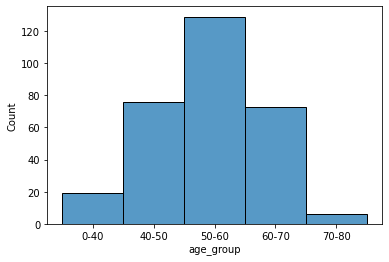

In [17]:
#create bins of different age group

#cut the data by age
df['age_group'] = pd.cut(df.age, bins=[0,40,50,60,70,80],labels=['0-40','40-50','50-60','60-70','70-80'])
sns.histplot(df['age_group'])

In [18]:
#function to split train/test dataset based on certain column(just in case future changes)
random_state = 42

def split_train_test(df,col):
  split = StratifiedShuffleSplit(n_splits=1, test_size=0.35, random_state=random_state)
  for train_index, test_index in split.split(df,df[col]):    #split based on df[col] distribution
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
    strat_train_set=train_set.drop(columns = col)  # drop the df[col], so the data is back to its original state
    strat_test_set = test_set.drop(columns = col)  
  return strat_train_set, strat_test_set


In [19]:
#create train/validation datasets: 
strat_train_set, strat_vali_set = split_train_test(df,'age_group')
X_train = strat_train_set.drop(columns='target')
y_train = strat_train_set['target'].copy()
X_test = strat_vali_set.drop(columns='target')
y_test = strat_vali_set['target'].copy()

In [20]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3


 **3, Data preparation for machinelearning**


*   Data encoding(process category data)
*   Feature scaling
*   Create pipeline to chain all of them











In [21]:
#categorical data- encoding
category_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
ohe = OneHotEncoder(sparse=False, drop= None)

In [22]:
#Create function to encode category columns, standard scale numeric data. Return new df with processed data. 
def column_trans(anyX):
  column_trans = make_column_transformer(
      (StandardScaler(),num_cat_headers),
      (OneHotEncoder(),category_columns)
    )
  
  trans_array = column_trans.fit_transform(anyX)
  columnNames = column_trans.get_feature_names_out()
  dataframeX = pd.DataFrame(trans_array, columns=columnNames)
  return dataframeX

In [23]:
#check processed Training dataset. Category data is encoded, numeric data is scaled.
column_trans(X_train)

#Create X_train_encoded, X_teset_encoded (with X_train, X_test added encoded columns)
X_train_encoded = column_trans(X_train)
X_test_encoded = column_trans(X_test)
X_train_encoded

,standardscaler__age,standardscaler__trestbps,standardscaler__thalach,standardscaler__oldpeak,standardscaler__chol,onehotencoder__sex_0,onehotencoder__sex_1,onehotencoder__cp_0,onehotencoder__cp_1,onehotencoder__cp_2,onehotencoder__cp_3,onehotencoder__fbs_0,onehotencoder__fbs_1,onehotencoder__restecg_0,onehotencoder__restecg_1,onehotencoder__restecg_2,onehotencoder__exang_0,onehotencoder__exang_1,onehotencoder__slope_0,onehotencoder__slope_1,onehotencoder__slope_2,onehotencoder__ca_0,onehotencoder__ca_1,onehotencoder__ca_2,onehotencoder__ca_3,onehotencoder__ca_4,onehotencoder__thal_0,onehotencoder__thal_1,onehotencoder__thal_2,onehotencoder__thal_3
0,-0.261931,-0.127618,1.438230,-0.853410,-0.835506,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.287731,0.620903,-1.162811,-0.679715,-0.176073,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-2.240712,-0.751384,1.011830,-0.853410,-1.256810,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.057257,2.492203,0.201670,-0.332325,-0.432519,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.287731,-0.626631,0.542790,-0.332325,1.893813,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.727460,0.496149,-1.077530,2.273101,-1.549891,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
192,0.727460,-0.626631,-0.437930,2.273101,0.171961,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
193,-1.141389,-1.375151,1.054470,-0.332325,-2.007830,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
194,-0.261931,-0.127618,0.457510,-0.853410,0.080373,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3


 **4, Train machine learning models**


In [25]:
#models to train
nb = GaussianNB()
neigh = KNeighborsClassifier(n_neighbors=5) #lazy tested, n = 5 is optimum 
tree =  DecisionTreeClassifier(random_state=0)
lgreg = LogisticRegression(solver='liblinear')
rf =  RandomForestClassifier(n_estimators=50, random_state=1)
svc = SVC(random_state=0)
xgb = XGBClassifier(random_state=0)
voting = VotingClassifier(estimators= [('naive_bayes', nb), ('KNN', neigh), ('tree',tree),('svc',svc),('xgb',xgb),('logistics Reg',lgreg),('random forest',rf)], voting='hard')

#summary of models
models = [('naive_bayes', nb), ('KNN', neigh), ('tree',tree),('svc',svc),('xgb',xgb), ('voting',voting), ('logistics Reg',lgreg),('random forest',rf)]

In [26]:
#create function to evaluate scores to use later.

#evaluate_model to check all scores got from cv
def evaluate_model(model, X, y):
  # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv = 5
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return model,scores

#check_score got Mean value of scores got from cv
def check_score(model, X, y):
  # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv =5
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise').mean()
  return model,scores


In [27]:
#Check all 'accuracy' scores from evaluating different models
score_result = []
score_dict = {}
for name,model in models:
  scores_w_name = evaluate_model(model, X_train_encoded,y_train)
  score_result.append(scores_w_name)
  score_dict[name]=scores_w_name
model_names = []
model_scores = []
for name,score in score_result:
  model_names.append(name)
  model_scores.append(score)
result_dict = {'name': model_names, 'score': model_scores}
result_df = pd.DataFrame(result_dict)
result_df

,name,score
0,GaussianNB(),"[0.85, 0.6923076923076923, 0.8461538461538461,..."
1,KNeighborsClassifier(),"[0.825, 0.7692307692307693, 0.8717948717948718..."
2,DecisionTreeClassifier(random_state=0),"[0.675, 0.717948717948718, 0.8717948717948718,..."
3,SVC(random_state=0),"[0.85, 0.717948717948718, 0.8461538461538461, ..."
4,XGBClassifier(),"[0.75, 0.8461538461538461, 0.8205128205128205,..."
5,"VotingClassifier(estimators=[('naive_bayes', G...","[0.825, 0.7948717948717948, 0.8717948717948718..."
6,LogisticRegression(solver='liblinear'),"[0.875, 0.7948717948717948, 0.8974358974358975..."
7,"RandomForestClassifier(n_estimators=50, random...","[0.8, 0.7948717948717948, 0.8205128205128205, ..."


In [28]:
scores=[]
for model, score in score_result:
  scores.append(score)
scores_df = pd.DataFrame(scores, index=model_names).T
scores_df

,GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(random_state=0),SVC(random_state=0),XGBClassifier(),"VotingClassifier(estimators=[('naive_bayes', GaussianNB()),\n ('KNN', KNeighborsClassifier()),\n ('tree', DecisionTreeClassifier(random_state=0)),\n ('svc', SVC(random_state=0)),\n ('xgb', XGBClassifier()),\n ('logistics Reg',\n LogisticRegression(solver='liblinear')),\n ('random forest',\n RandomForestClassifier(n_estimators=50,\n random_state=1))])",LogisticRegression(solver='liblinear'),"RandomForestClassifier(n_estimators=50, random_state=1)"
0,0.850000,0.825000,0.675000,0.850000,0.750000,0.825000,0.875000,0.800000
1,0.692308,0.769231,0.717949,0.717949,0.846154,0.794872,0.794872,0.794872
2,0.846154,0.871795,0.871795,0.846154,0.820513,0.871795,0.897436,0.820513
3,0.615385,0.846154,0.794872,0.846154,0.794872,0.846154,0.794872,0.871795
4,0.743590,0.820513,0.820513,0.820513,0.897436,0.846154,0.846154,0.820513


In [29]:
# Check mean value of accuracy scores by different model scores
check_result=[]
for m in models:
  check_result.append(check_score(m[1],X_train_encoded, y_train))
check_result

[(GaussianNB(), 0.7494871794871795),
 (KNeighborsClassifier(), 0.8265384615384616),
 (DecisionTreeClassifier(random_state=0), 0.776025641025641),
 (SVC(random_state=0), 0.8161538461538461),
 (XGBClassifier(), 0.8217948717948719),
 (VotingClassifier(estimators=[('naive_bayes', GaussianNB()),
                               ('KNN', KNeighborsClassifier()),
                               ('tree', DecisionTreeClassifier(random_state=0)),
                               ('svc', SVC(random_state=0)),
                               ('xgb', XGBClassifier()),
                               ('logistics Reg',
                                LogisticRegression(solver='liblinear')),
                               ('random forest',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=1))]),
  0.8367948717948718),
 (LogisticRegression(solver='liblinear'), 0.8416666666666666),
 (RandomForestClassifier(n_estimators=50,

In [30]:
#Create shorted names for ploting the score
model_names
short_names = []
for i in model_names:
  short_names.append(str(i)[:3])
short_names
scores_df.columns=short_names

Text(0.5, 1.0, "ML models' accuracy scores")

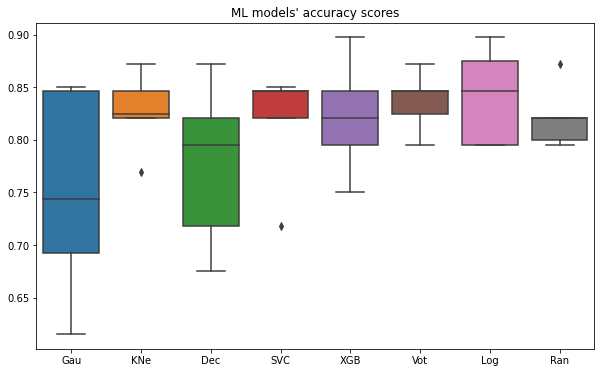

In [31]:
#create boxplot to visualize performance of different ML models
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=scores_df)
ax.set_xticklabels(short_names)
plt.title('''ML models' accuracy scores''')

#**5, Tune hyperparameters** 

In [32]:
#only test best performers
#xgb,vot, log, KNN

In [33]:
#create function to calculate accuracy score by tuned models
def tuned_evaluation(model, distribution,X,y):
  random = RandomizedSearchCV(model, distribution, random_state=0, scoring='accuracy', n_jobs=-1)
  search = random.fit(X,y)
  print(search.best_params_)
  tuned_model = search.best_estimator_
  recall_score = evaluate_model(tuned_model,X,y)[1].mean()
  return recall_score

In [34]:
#tuned model
def tuned_model(model, distribution, X,y):
  random = RandomizedSearchCV(model, distribution, random_state=0, scoring='accuracy', n_jobs=-1)
  search = random.fit(X,y)
  tuned_model = search.best_estimator_
  return tuned_model

In [35]:
#Logistics regression
log_distributions = dict(C=[100, 10, 1.0, 0.1, 0.01],
                         penalty=['l1'],
                         solver=['liblinear', 'saga'])
print('lg_orignal score on train dataset ',check_score(lgreg,X_train_encoded,y_train)[1])#0.84
print('lg_tuned on train dataset',tuned_evaluation(lgreg, log_distributions,X_train_encoded, y_train)) #lg_tuned on train dataset 0.84
print('lg_tuned on test dataset',tuned_evaluation(lgreg, log_distributions,X_test_encoded, y_test)) #0.78

lg_orignal score on train dataset  0.8416666666666666
{'solver': 'liblinear', 'penalty': 'l1', 'C': 1.0}
lg_tuned on train dataset 0.8416666666666666
{'solver': 'saga', 'penalty': 'l1', 'C': 1.0}
lg_tuned on test dataset 0.7865800865800866


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [36]:
#xgb
xgb_distributions = dict(booster =['gbtree', 'gblinear', 'dart'],
                         verbosity=[0,1,2,3])
print('xgb_orignal score on train dataset ',check_score(xgb,X_train_encoded,y_train)[1])#0.82
print('xgb_tuned on train dataset',tuned_evaluation(xgb, xgb_distributions,X_train_encoded, y_train)) #0.82
print('xgb_tuned on test dataset',tuned_evaluation(xgb, xgb_distributions,X_test_encoded, y_test)) #0.76

xgb_orignal score on train dataset  0.8217948717948719
[22:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:13:39] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:13:39] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:13:39] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:13:39] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:13:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_dept

In [37]:
nb_distribution = {'var_smoothing': np.logspace(0,-9, num=100)}
print('nb_orignal score on train dataset ',check_score(nb,X_train_encoded,y_train)[1])#0.74
print('nb_tuned on train dataset',tuned_evaluation(nb, nb_distribution,X_train_encoded, y_train)) #0.85
print('nb_tuned on test dataset',tuned_evaluation(nb, nb_distribution,X_test_encoded, y_test)) #0.81

nb_orignal score on train dataset  0.7494871794871795
{'var_smoothing': 0.03511191734215131}
nb_tuned on train dataset 0.8569230769230769
{'var_smoothing': 0.03511191734215131}
nb_tuned on test dataset 0.8138528138528139


In [38]:
voting_distribution = dict(voting=['soft', 'hard'],weights = [(1,1,1,1,1,1,1), (1,2,1,1,1,1,1), (1,1,2,1,1,1,1), (1,1,1,2,1,1,1), (1,1,1,1,2,1,1),(1,1,1,1,1,2,1),(1,1,1,1,1,1,2)])
print('voting_orignal score on train dataset ',check_score(voting,X_train_encoded,y_train)[1])#0.83
print('voting_tuned on train dataset',tuned_evaluation(voting, voting_distribution,X_train_encoded, y_train)) #0.76
print('voting_tuned on test dataset',tuned_evaluation(voting, voting_distribution,X_test_encoded, y_test)) #0.77

voting_orignal score on train dataset  0.8367948717948718


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.83153846        nan        nan 0.82666667        nan 0.83179487
 0.82153846        nan 0.83679487 0.83166667]
  category=UserWarning,


{'weights': (1, 1, 1, 1, 1, 1, 1), 'voting': 'hard'}
voting_tuned on train dataset 0.8367948717948718


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.77705628        nan        nan 0.76796537        nan 0.75887446
 0.76839827        nan 0.77705628 0.77705628]
  category=UserWarning,


{'weights': (1, 2, 1, 1, 1, 1, 1), 'voting': 'hard'}
voting_tuned on test dataset 0.7770562770562771


KNN

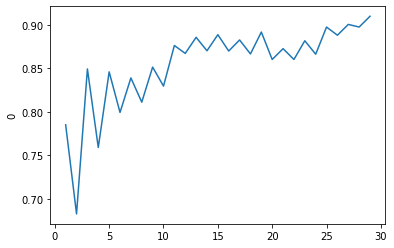

In [39]:
# check # of neighbors value from 1 to 30, get scores of knn
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_scores_dict={}
for i in range(1,30):
  knn_score = cross_val_score(KNeighborsClassifier(n_neighbors = i), X_train_encoded, y_train, scoring='recall', cv=cv, n_jobs=-1, error_score='raise').mean()
  knn_scores_dict[i]=knn_score
knn_scores_dict

#turn dictionary into df
knn_scores_df = pd.DataFrame(data=[knn_scores_dict.values()], columns=knn_scores_dict.keys()).T

#plot n and different recall scores
sns.lineplot(data=knn_scores_df[0])

In [40]:
top_top_neighbor_selected=[3,5] #! shouldn't go high, elbow 

knn_distribution = dict(n_neighbors=top_top_neighbor_selected,
                    weights=['uniform','distance'],
                    metric=['euclidean', 'manhattan', 'minkowski']
                   )

In [41]:
print('KNN_orignal score on train dataset ',check_score(neigh,X_train_encoded,y_train)[1])#0.82
print('KNN_tuned on train dataset',tuned_evaluation(neigh, knn_distribution,X_train_encoded, y_train)) #0.85
print('KNN_tuned on test dataset',tuned_evaluation(neigh, knn_distribution,X_test_encoded, y_test)) #0.82

KNN_orignal score on train dataset  0.8265384615384616
{'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski'}
KNN_tuned on train dataset 0.8570512820512821
{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}
KNN_tuned on test dataset 0.8238095238095238


SVC

In [42]:
svc_distribution =dict(
    kernel = ['poly', 'rbf', 'sigmoid'],
    C = [50, 10, 1.0, 0.1, 0.01],
    gamma = ['scale','auto']
)

print('SVM_orignal score on train dataset ',check_score(svc,X_train_encoded,y_train)[1])#0.87
print('SVM_tuned on train dataset',tuned_evaluation(svc, svc_distribution,X_train_encoded, y_train)) #1 ????
print('SVM_tuned on test dataset',tuned_evaluation(svc, svc_distribution,X_test_encoded, y_test)) #1????

SVM_orignal score on train dataset  0.8161538461538461
{'kernel': 'sigmoid', 'gamma': 'auto', 'C': 1.0}
SVM_tuned on train dataset 0.8262820512820512
{'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
SVM_tuned on test dataset 0.767965367965368


#**6, Feature Importance**


In [43]:
def plot_feature_importances(feature_importances, labels): 
  df_to_plot = pd.DataFrame(dict(label=labels,data=feature_importances)) #note [] for data inside dataFrame
  df_to_plot = df_to_plot.sort_values(by='data', axis=0) #arrange dataframe
  plt.figure(figsize= (10,12))
  sns.barplot(y='label',x='data',data=df_to_plot)
  plt.ylabel('Importance')
  plt.title('Feature importance')

In [44]:
#XGB tuned importance
xgb_tuned = tuned_model(xgb, xgb_distributions, X_train_encoded, y_train)
xgb_importance = xgb_tuned.get_booster().get_score(importance_type='gain')
xgb_labels = X_train_encoded.columns
# plot_feature_importances(xgb_importance, xgb_labels)

[22:14:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:14:06] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:14:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:14:06] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:14:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:14:06] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:14:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:14:06] INFO: /workspace/src/gbm/gbtree.cc:479: drop 0 trees, weight = 1
[22:14:06] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[22:14:06] INFO: /workspace/src/gbm/gbtree.cc:479: 

In [45]:
xgb_importance_df = pd.DataFrame(data=[xgb_importance.values()], columns=xgb_importance.keys())
xgb_importance_df.sort_values(by=0, axis=1, inplace=True, ascending=False)

Text(0.5, 1.0, 'Feature Importance - xgb')

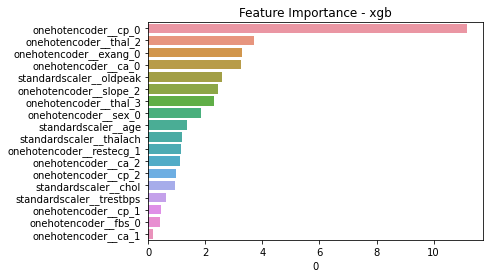

In [46]:
sns.barplot(x=xgb_importance_df.iloc[0], y=xgb_importance_df.columns)
plt.title('Feature Importance - xgb')

Text(0.5, 1.0, 'Feature Importance - Logistics Regression')

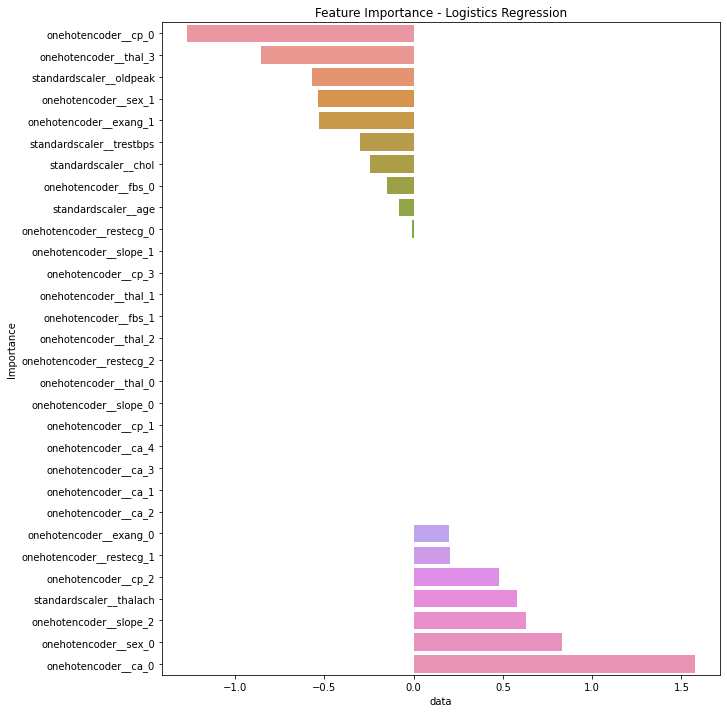

In [47]:
#Tune logistics
lgreg_tuned = tuned_model(lgreg, log_distributions, X_train_encoded, y_train)
lgreg_importance = lgreg_tuned.coef_[0]
lgreg_labels = X_train_encoded.columns
plot_feature_importances(lgreg_importance, lgreg_labels)
plt.title('Feature Importance - Logistics Regression')